<a href="https://colab.research.google.com/github/Luis-Hauck/Analise_Exploratoria_Suicidios_no_Brasil/blob/main/Analise_Exploratoria_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ANÁLISE EXPLORATÓRIA GERAL DE DADOS



In [2]:
#Importações
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'dark')


In [3]:
#Aqauisição dos dados
df = pd.read_csv('https://raw.githubusercontent.com/Luis-Hauck/Analise_Exploratoria_Suicidios_no_Brasil/main/master.csv')

In [33]:
df.head(5)

,0
country,Uzbekistan
year,2016
sex,male
age,75+ years
suicides_no,22338
population,43805214
suicides/100k pop,224.97
country-year,Uzbekistan2014
HDI for year,0.944
gdp_for_year ($),"997,007,926"


In [43]:
df.shape

(27820, 12)

In [8]:
#Verificamso valores nulos
df.isnull().sum()

,0
country,0
year,0
sex,0
age,0
suicides_no,0
population,0
suicides/100k pop,0
country-year,0
HDI for year,19456
gdp_for_year ($),0


In [7]:
#verificamos Valores Duplicados
df.duplicated().sum()

0

In [5]:
#Verificamos a estrutura do df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [6]:
#Verificamos alguns dados
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [35]:
#Identificando valor máximo
df_max = df[df['suicides_no'] == df['suicides_no'].max()]
df_max

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
20996,Russian Federation,1994,male,35-54 years,22338,19044200,117.3,Russian Federation1994,NaN,"395,077,301,248",2853,Boomers


##Números de Sucídios por Ano

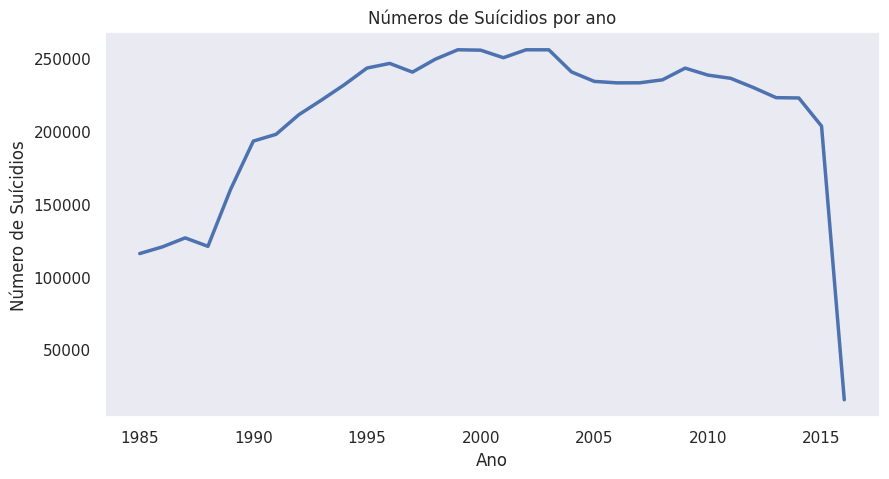

In [9]:
#Agrupamos os números de suicídios por anos
num_suic = df.groupby('year')['suicides_no'].sum()
#Criamos o gráfico
fig, ax = plt.subplots(figsize = (10,5))
sns.lineplot(x = num_suic.index, y = num_suic.values, linewidth=2.5 )
plt.xlabel('Ano')
plt.ylabel('Número de Suícidios')
plt.title('Números de Suícidios por ano')
plt.show()

###Dados ausentes ou outlier no número de suicídios

Podemos perceber que ocorreu uma grande queda no ano de 2015 para 2016, podendo ser uma falta de dados desse período ou realmente uma queda no número de suícidios, por conta disso tomei a decisão de retirar os valores desse ano para nossa análise.

In [10]:
#criamos o df2 retirando o ano de 2016
df2 = df[df['year'] != 2016]

In [11]:
df2.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27660.000000,27660.000000,2.766000e+04,27660.000000,8364.000000,27660.000000
mean,2001.173102,243.413485,1.850689e+06,12.812597,0.776601,16815.568330
std,8.418754,904.490185,3.920658e+06,18.972063,0.093367,18861.585497
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1994.000000,3.000000,9.753525e+04,0.910000,0.713000,3436.000000
50%,2002.000000,25.000000,4.307250e+05,5.980000,0.779000,9283.000000
75%,2008.000000,132.000000,1.491041e+06,16.602500,0.855000,24796.000000
max,2015.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27660 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27660 non-null  object 
 1   year                27660 non-null  int64  
 2   sex                 27660 non-null  object 
 3   age                 27660 non-null  object 
 4   suicides_no         27660 non-null  int64  
 5   population          27660 non-null  int64  
 6   suicides/100k pop   27660 non-null  float64
 7   country-year        27660 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27660 non-null  object 
 10  gdp_per_capita ($)  27660 non-null  int64  
 11  generation          27660 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.7+ MB


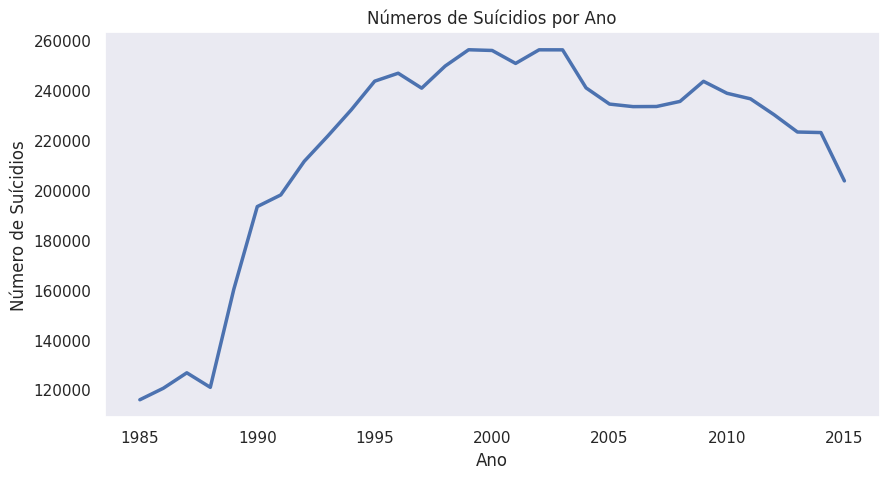

In [13]:
#Agrupamos os números de suicídios por anos
num_suic = df2.groupby('year')['suicides_no'].sum()
#Criamos o gráfico
fig, ax = plt.subplots(figsize = (10,5))
sns.lineplot(x = num_suic.index, y = num_suic.values, linewidth=2.5 )
plt.xlabel('Ano')
plt.ylabel('Número de Suícidios')
plt.title('Números de Suícidios por Ano')
plt.show()

##Países com maiores numeros de Suicídios entre 1985-2015

In [14]:
#Agruapamos o número de suícidios por pais
total_suicidios = df2.groupby('country')['suicides_no'].sum().reset_index().sort_values(by = 'suicides_no', ascending=False).head(10)

In [15]:
total_suicidios

,country,suicides_no
74,Russian Federation,1209742
97,United States,1034013
46,Japan,806902
33,France,329127
94,Ukraine,319950
35,Germany,291262
72,Republic of Korea,261730
15,Brazil,226613
68,Poland,139098
96,United Kingdom,136805


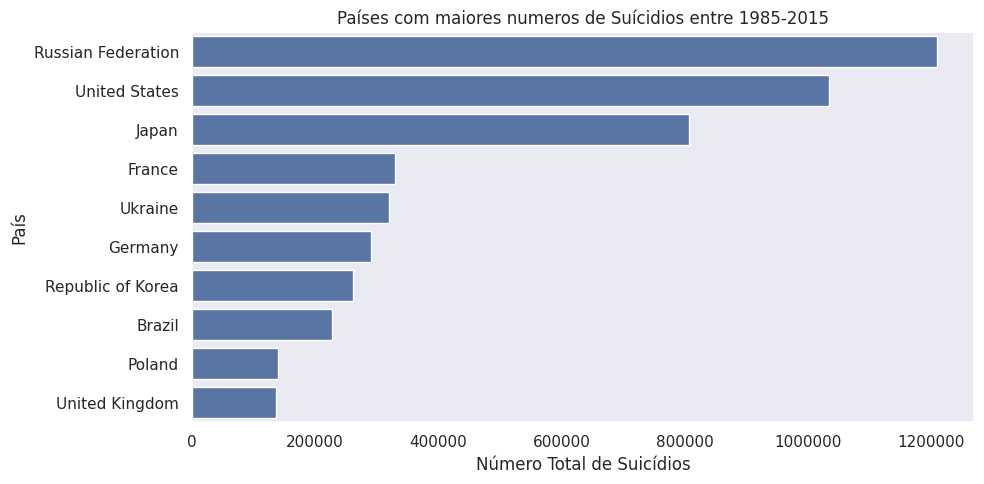

In [16]:
#Criamos os Gráfico
fig, ax = plt.subplots(figsize = (10,5))
sns.barplot(y = total_suicidios['country'], x = total_suicidios['suicides_no'])
plt.xlabel('Número Total de Suicídios')
plt.ylabel('País')
plt.title('Países com maiores numeros de Suícidios entre 1985-2015')
ax.ticklabel_format(style='plain', axis='x')
plt.tight_layout()

###Números de Sucídios por Ano na Rússia

<ipython-input-41-62805db818c0>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_russia = df2[df['country'] == 'Russian Federation']


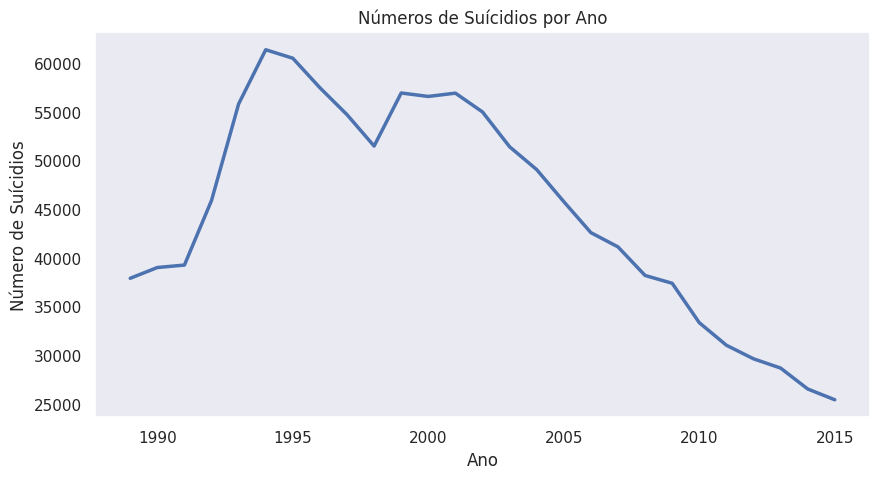

In [41]:
#Agrupamos os números de suicídios por anos na Rússia
df_russia = df2[df['country'] == 'Russian Federation']
df_russia = df_russia.groupby('year')['suicides_no'].sum()
#Criamos o gráfico
fig, ax = plt.subplots(figsize = (10,5))
sns.lineplot(x = df_russia.index, y = df_russia.values, linewidth=2.5 )
plt.xlabel('Ano')
plt.ylabel('Número de Suícidios')
plt.title('Números de Suícidios por Ano')
plt.show()

## Tendência de Suicídio por geração da População


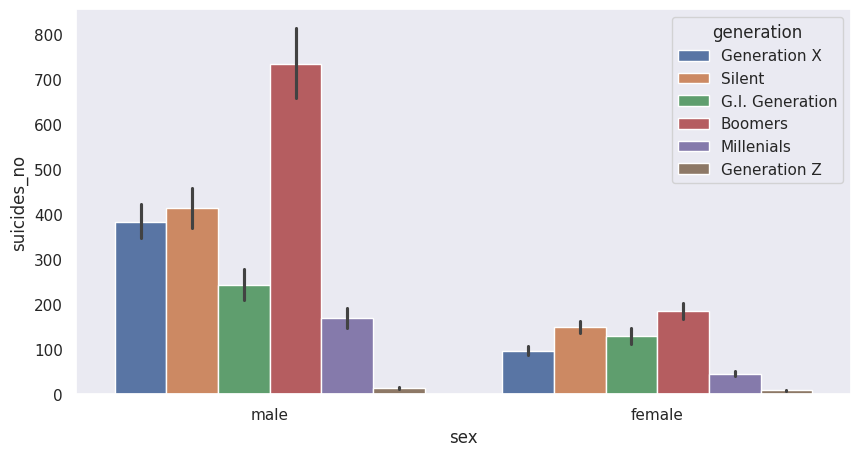

In [17]:
#Plotamos o gráfico
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x='sex', y='suicides_no', hue='generation', data = df2)
plt.show()

##Distribuição de Suicídios VS Produto Interno Bruto (PIB) per capita




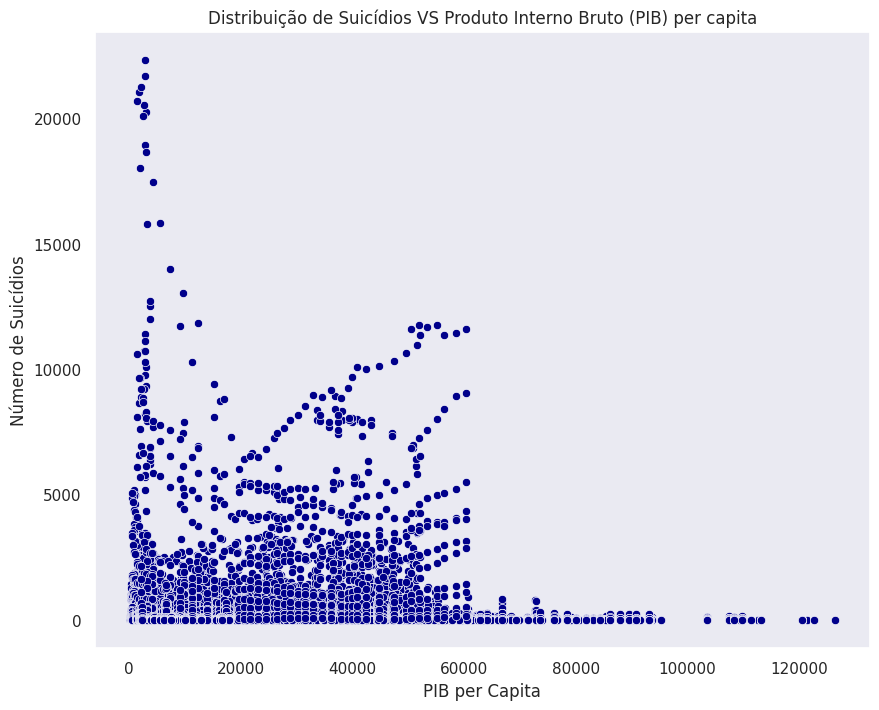

In [18]:
#Plotando o Gráfico
plt.figure(figsize=(10,8))
sns.scatterplot(x='gdp_per_capita ($)', y='suicides_no', data=df, color='darkblue')
plt.title('Distribuição de Suicídios VS Produto Interno Bruto (PIB) per capita')
plt.xlabel('PIB per Capita')
plt.ylabel('Número de Suicídios')
plt.show()

#SUICÍDIOS NO BRASIL:

In [19]:
#Criamos um df só com os dados do Brasil
suic_brasil = df2[df2['country'] == 'Brazil']

In [20]:
suic_brasil.info()

<class 'pandas.core.frame.DataFrame'>
Index: 372 entries, 4172 to 4543
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             372 non-null    object 
 1   year                372 non-null    int64  
 2   sex                 372 non-null    object 
 3   age                 372 non-null    object 
 4   suicides_no         372 non-null    int64  
 5   population          372 non-null    int64  
 6   suicides/100k pop   372 non-null    float64
 7   country-year        372 non-null    object 
 8   HDI for year        120 non-null    float64
 9    gdp_for_year ($)   372 non-null    object 
 10  gdp_per_capita ($)  372 non-null    int64  
 11  generation          372 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 37.8+ KB


In [21]:
suic_brasil.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,372.000000,372.000000,3.720000e+02,372.000000,120.000000,372.000000
mean,2000.000000,609.174731,1.305401e+07,5.846022,0.694900,6091.483871
std,8.956318,652.567097,6.655806e+06,5.623846,0.061539,3711.626223
min,1985.000000,25.000000,6.556210e+05,0.150000,0.576000,1898.000000
25%,1992.000000,99.500000,8.193910e+06,2.152500,0.648000,3310.000000
50%,2000.000000,348.000000,1.478517e+07,2.800000,0.719500,4490.000000
75%,2008.000000,939.000000,1.749273e+07,9.855000,0.746000,9283.000000
max,2015.000000,3238.000000,2.846186e+07,23.920000,0.755000,14245.000000


## Comparação dos Casos de Suicídio: Brasil - Mundo




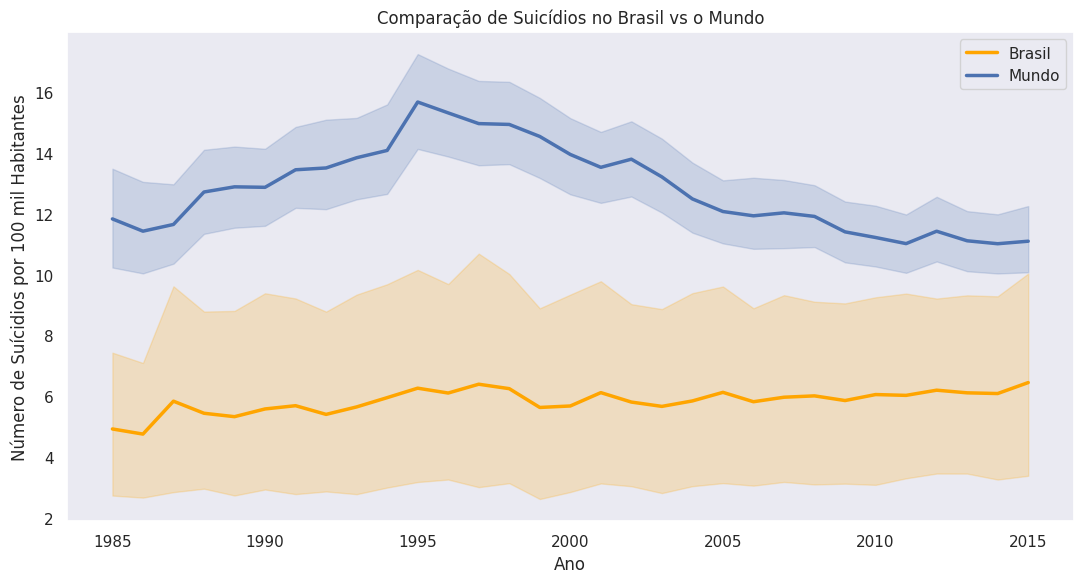

In [22]:
#Plotando o gráfico
fig, ax = plt.subplots(figsize=(11,6))
ax = sns.lineplot(x=suic_brasil['year'], y=suic_brasil['suicides/100k pop'], color='orange', label='Brasil', linewidth=2.5)
ax = sns.lineplot(x=df2['year'], y=df2['suicides/100k pop'], color='b', label='Mundo',linewidth=2.5)
plt.title('Comparação de Suicídios no Brasil vs o Mundo')
plt.xlabel('Ano')
plt.ylabel('Número de Suícidios por 100 mil Habitantes')
plt.tight_layout()

##Número de Suicídios por idade

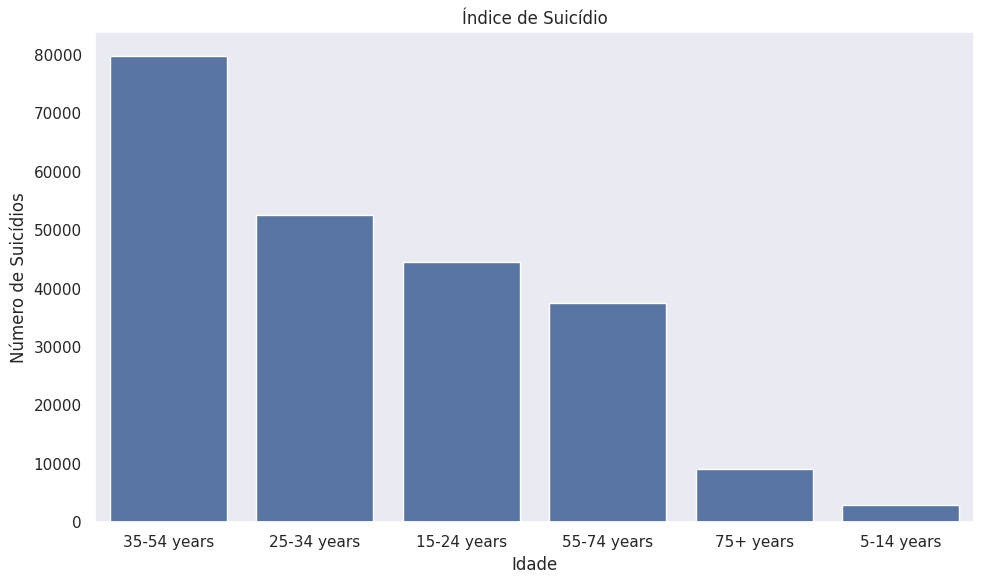

In [23]:
num_idade= suic_brasil.groupby('age')['suicides_no'].sum().reset_index().sort_values(by=['suicides_no'],ascending = False)
#Plotando o gráfico
plt.figure(figsize=(10,6))
sns.barplot(x=num_idade['age'], y=num_idade['suicides_no'])
plt.title('Índice de Suicídio')
plt.xlabel('Idade')
plt.ylabel('Número de Suicídios')
plt.tight_layout()

##Taxa de Suicídios Entre Homens e Mulheres

In [24]:
#Agrupamos números de suícidios
genero = suic_brasil.groupby('sex')['suicides_no'].sum()

([<matplotlib.patches.Wedge at 0x784a15c0a260>,
 [Text(0.9334589993147488, 0.7540917030430104, 'female'),
  Text(-0.8556707817316342, -0.6912506877325866, 'male')],
 [Text(0.5445177496002702, 0.4398868267750894, '21.63%'),
  Text(-0.4667295173081641, -0.3770458296723199, '78.37%')])

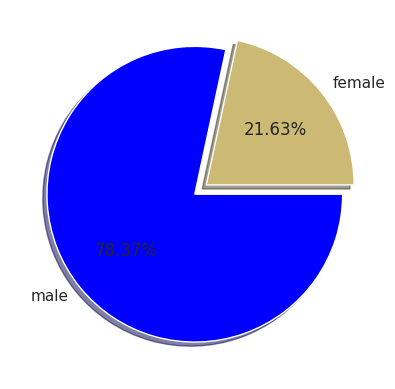

In [25]:
#Criamos o gráfico
plt.pie(genero, labels = genero.index,autopct='%.2f%%', shadow=True, colors = ['y', 'blue'], explode=[0.1, 0])